# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium 

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,10

# Reading the Data

In [3]:
dataset = pd.read_csv('superstore-data.csv', engine='python')

In [4]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,08/11/19,11/11/19,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,08/11/19,11/11/19,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,12/06/19,16/06/19,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,11/10/18,18/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,11/10/18,18/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Preprocessing

In [5]:
dataset.shape

(9994, 21)

In [6]:
dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [8]:
# We see that the data type of the Order Date and Ship Date is 'object'
# So we convert it to the 'datetime' datatype

dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'])

In [9]:
dataset.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [10]:
# As there are only 11 NULL values we drop those rows

dataset.dropna(inplace=True)

In [11]:
dataset['Country/Region'].value_counts()

United States    9983
Name: Country/Region, dtype: int64

In [12]:
# As all the sales were withing Unites States we dont require the 'Country/Region' column 
# Similary 'Row ID' column is just the serial number so we can drop this column as well

dataset = dataset.drop('Row ID', axis = 1)
dataset = dataset.drop('Country/Region', axis = 1)

# Data Analysis

In [13]:
# State-wise Sale 

state_data = dataset[['State', 'Sales']]
state_data = state_data.groupby(['State'], as_index=False).sum()
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"

state_sales_map = folium.Map(location=[37, -102], zoom_start=5)

state_sales_map.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Sales'],
 key_on='properties.name',
 fill_color='PuBu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Sales'
)
folium.LayerControl().add_to(state_sales_map)
state_sales_map

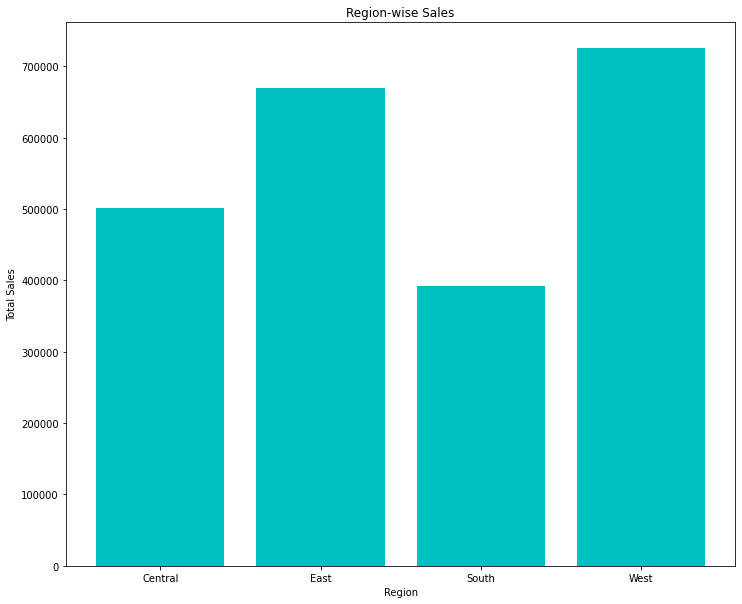

In [14]:
# Region-wise Sales

region_data = dataset.groupby(['Region'], as_index=False).sum()

plt.bar(region_data['Region'], region_data['Sales'], color ='c') 
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Region-wise Sales")
plt.show()

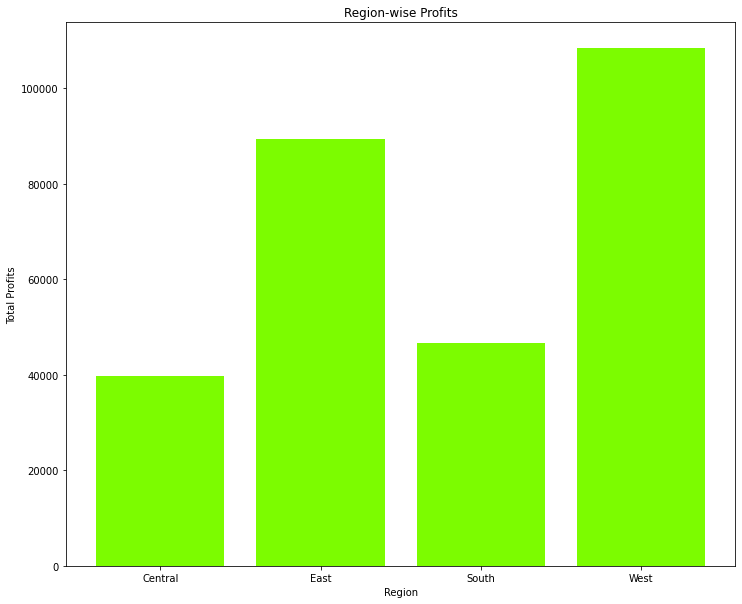

In [15]:
plt.bar(region_data['Region'], region_data['Profit'], color ='lawngreen') 
plt.xlabel("Region")
plt.ylabel("Total Profits")
plt.title("Region-wise Profits")
plt.show()

In [16]:
# Customer-wise Sales

customer_data = dataset['Customer Name'].value_counts()

# Viewing the Customers who order frequently
customer_data.head(15)

William Brown          37
Paul Prost             34
John Lee               34
Matt Abelman           34
Chloris Kastensmidt    32
Edward Hooks           32
Jonathan Doherty       32
Seth Vernon            32
Emily Phan             31
Arthur Prichep         31
Zuschuss Carroll       31
Lena Cacioppo          30
Sally Hughsby          29
Ken Lonsdale           29
Brian Moss             29
Name: Customer Name, dtype: int64

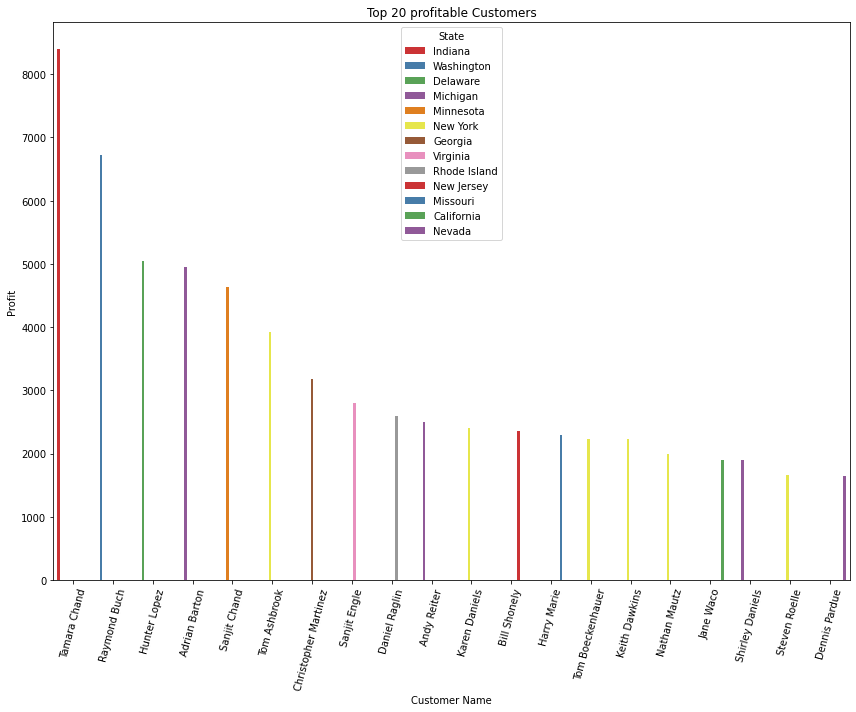

In [17]:
profitable_20 = dataset.sort_values(by="Profit", ascending=False).head(20)

fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.barplot('Customer Name', 'Profit',hue='State',palette='Set1', data=profitable_20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [18]:
# Monthly/Yearly Sales

sales_data = dataset[['Order Date', 'Category', 'Sales', 'Profit']]
sales_data['year'], sales_data['month'] = sales_data['Order Date'].dt.year, sales_data['Order Date'].dt.month

In [19]:
yearly = sales_data.groupby('year').agg({"Sales":np.sum, "Profit": np.sum})
monthly = sales_data.groupby('month').agg({"Sales":np.sum, "Profit": np.sum})

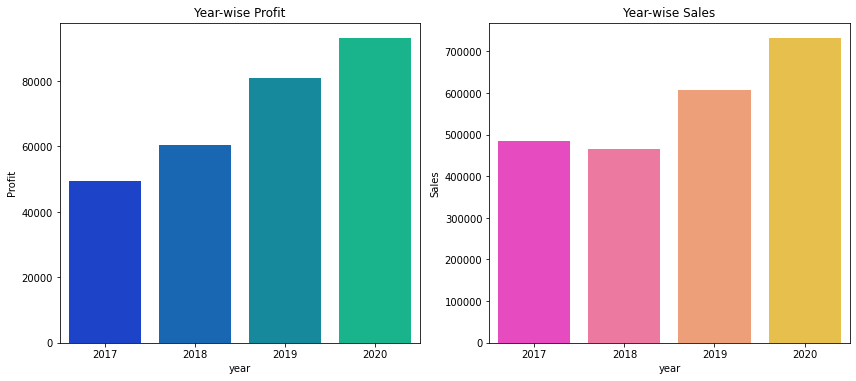

In [20]:
fig = plt.figure()

ax = fig.add_subplot(221)
p=sns.barplot(yearly.index, "Profit", data=yearly, palette="winter", ax=ax)
ax.set_title("Year-wise Profit")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)

ax = fig.add_subplot(222)
p=sns.barplot(yearly.index, "Sales", data=yearly, palette="spring", ax=ax)
ax.set_title("Year-wise Sales")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

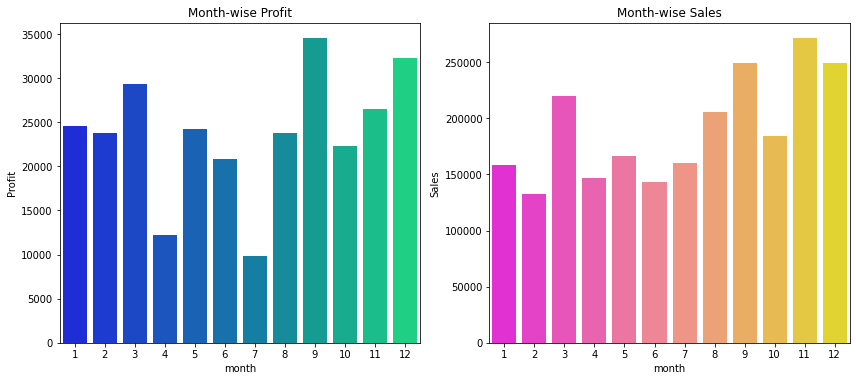

In [21]:
fig = plt.figure()

ax = fig.add_subplot(221)
p=sns.barplot(monthly.index, "Profit", data=monthly, palette="winter", ax=ax)
ax.set_title("Month-wise Profit")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)

ax = fig.add_subplot(222)
p=sns.barplot(monthly.index, "Sales", data=monthly, palette="spring", ax=ax)
ax.set_title("Month-wise Sales")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()